In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('messages.csv', nrows=10)
df.tail()

,subject,message,label
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [3]:
df.drop(columns=['subject'], inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10 non-null     object
 1   label    10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0
5,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics at the uni...,0
7,call for papers linguistics session - - midwes...,0
8,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,0


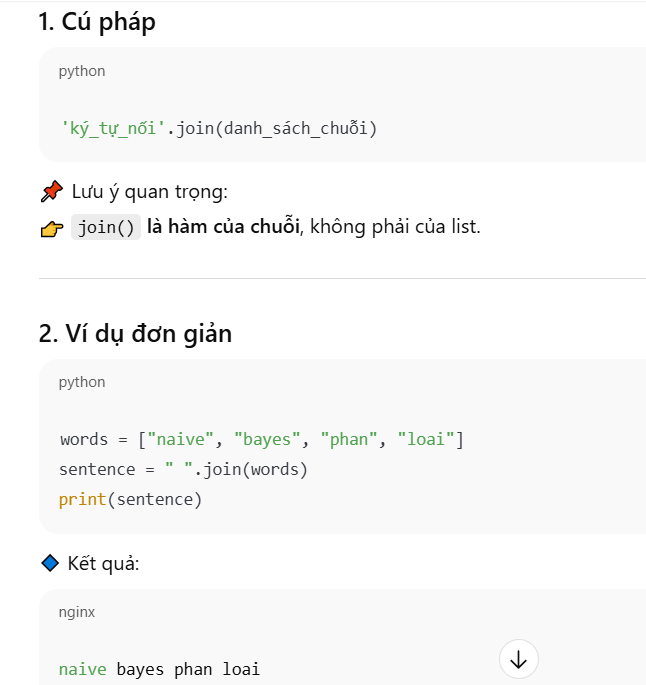

In [4]:
# convert to lowercase
df['cleaned_message'] = df['message'].str.lower()
df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content - length : 3386 apple-iss research cen...
1,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e . and ba..."
2,i am posting this inquiry for sergei atamas ( ...,0,i am posting this inquiry for sergei atamas ( ...
3,a colleague and i are researching the differin...,0,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...,0,earlier this morning i was on the phone with a...
5,content - length : 4437 call for papers is the...,0,content - length : 4437 call for papers is the...
6,m . a . in scandinavian linguistics at the uni...,0,m . a . in scandinavian linguistics at the uni...
7,call for papers linguistics session - - midwes...,0,call for papers linguistics session - - midwes...
8,content - length : 1937 greetings ! i ' m wond...,0,content - length : 1937 greetings ! i ' m wond...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement : please post / dissemi...


In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

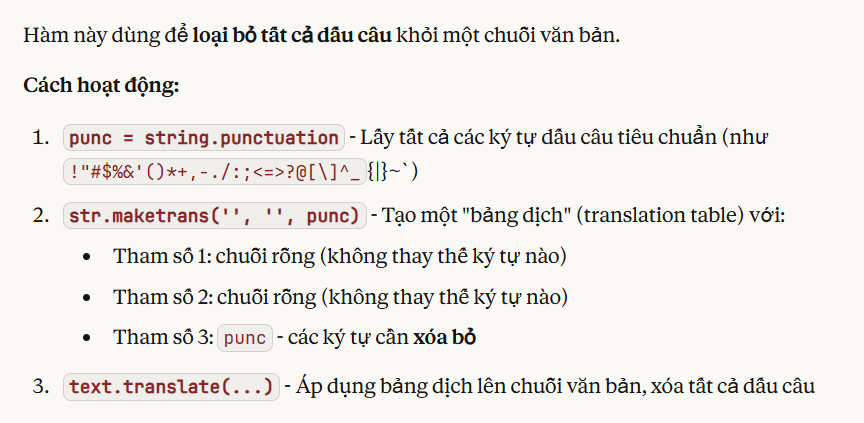

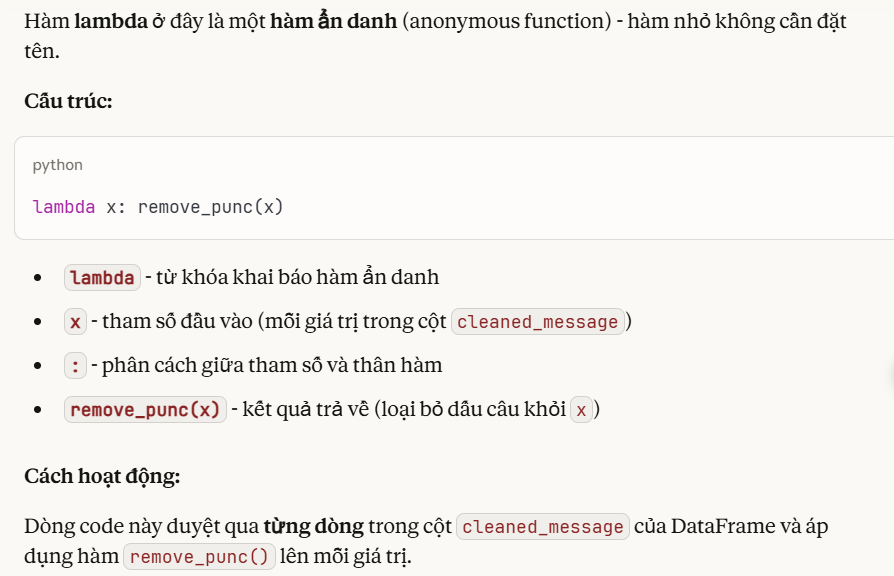

In [6]:
# remove dấu câu (punctuations)
def remove_punc(text):
    punc = string.punctuation
    return text.translate(str.maketrans('', '', punc))

df["cleaned_message"] = df["message"].apply(remove_punc)
# or
# df["cleaned_message"] = df["message"].apply(lambda x: remove_punc(x))

df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content length 3386 appleiss research center...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grimes joseph e and barb...
2,i am posting this inquiry for sergei atamas ( ...,0,i am posting this inquiry for sergei atamas s...
3,a colleague and i are researching the differin...,0,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...,0,earlier this morning i was on the phone with a...
5,content - length : 4437 call for papers is the...,0,content length 4437 call for papers is the b...
6,m . a . in scandinavian linguistics at the uni...,0,m a in scandinavian linguistics at the unive...
7,call for papers linguistics session - - midwes...,0,call for papers linguistics session midwest ...
8,content - length : 1937 greetings ! i ' m wond...,0,content length 1937 greetings i m wonderin...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement please post dissemina...


In [7]:
# remove stopword
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [8]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(texts):
    new_texts = []
    for text in texts:
        if text not in STOPWORDS:
            new_texts.append(text)
    text_final = ' '.join(new_texts)
    return text_final

def remove_stopwords_v2(text):
    return " ".join(
        [word for word in text.split() if word not in STOPWORDS]
    )

df['cleaned_message'] = df['cleaned_message'].apply(lambda x: remove_stopwords_v2(x))
df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content length 3386 appleiss research center u...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grimes joseph e barbara f ...
2,i am posting this inquiry for sergei atamas ( ...,0,posting inquiry sergei atamas satamas umabnet ...
3,a colleague and i are researching the differin...,0,colleague researching differing degrees risk p...
4,earlier this morning i was on the phone with a...,0,earlier morning phone friend mine living south...
5,content - length : 4437 call for papers is the...,0,content length 4437 call papers best good enou...
6,m . a . in scandinavian linguistics at the uni...,0,scandinavian linguistics university tromsoe 19...
7,call for papers linguistics session - - midwes...,0,call papers linguistics session midwest modern...
8,content - length : 1937 greetings ! i ' m wond...,0,content length 1937 greetings wondering someon...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement please post disseminate...


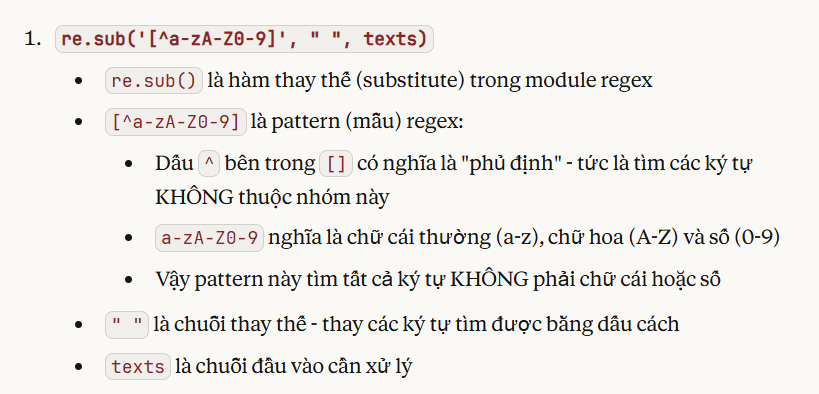

In [9]:
# remove special characters

import re

def remove_character(texts):
    texts = re.sub('[^a-zA-Z0-9]', " ", texts)
    texts = re.sub('\s+', " ", texts) # chuan hoa khoang trang
    return texts

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\trand\AppData\Local\Temp\ipykernel_6132\3912026331.py:7: SyntaxWarning: invalid escape sequence '\s'
  texts = re.sub('\s+', " ", texts) # chuan hoa khoang trang


In [10]:
df['cleaned_message'] = df['cleaned_message'].apply(lambda x: remove_character(x))
df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content length 3386 appleiss research center u...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grimes joseph e barbara f ...
2,i am posting this inquiry for sergei atamas ( ...,0,posting inquiry sergei atamas satamas umabnet ...
3,a colleague and i are researching the differin...,0,colleague researching differing degrees risk p...
4,earlier this morning i was on the phone with a...,0,earlier morning phone friend mine living south...
5,content - length : 4437 call for papers is the...,0,content length 4437 call papers best good enou...
6,m . a . in scandinavian linguistics at the uni...,0,scandinavian linguistics university tromsoe 19...
7,call for papers linguistics session - - midwes...,0,call papers linguistics session midwest modern...
8,content - length : 1937 greetings ! i ' m wond...,0,content length 1937 greetings wondering someon...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement please post disseminate...


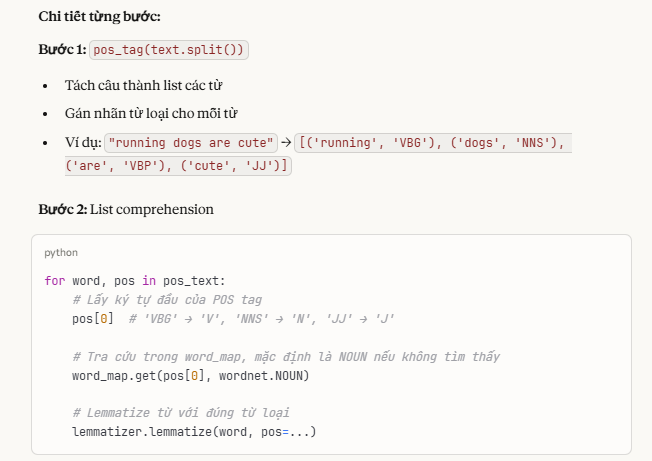

In [11]:
# lemmantization & POS Tagging
from nltk import pos_tag
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger_eng')


lemmatizer = WordNetLemmatizer()
word_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV
}

def lemmatizer_word(text):
    pos_text = pos_tag(text.split())
    return " ".join([
        lemmatizer.lemmatize(word, pos=word_map.get(pos[0], wordnet.NOUN)) 
        for word, pos in pos_text
    ])


df["lemmatizer_text"] = df['cleaned_message'].apply(lambda x: lemmatizer_word(x))
df

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\trand\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,message,label,cleaned_message,lemmatizer_text
0,content - length : 3386 apple-iss research cen...,0,content length 3386 appleiss research center u...,content length 3386 appleiss research center u...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grimes joseph e barbara f ...,lang classification grime joseph e barbara f g...
2,i am posting this inquiry for sergei atamas ( ...,0,posting inquiry sergei atamas satamas umabnet ...,post inquiry sergei atamas satamas umabnet ab ...
3,a colleague and i are researching the differin...,0,colleague researching differing degrees risk p...,colleague research differ degree risk perceive...
4,earlier this morning i was on the phone with a...,0,earlier morning phone friend mine living south...,earlier morning phone friend mine live south a...
5,content - length : 4437 call for papers is the...,0,content length 4437 call papers best good enou...,content length 4437 call paper best good enoug...
6,m . a . in scandinavian linguistics at the uni...,0,scandinavian linguistics university tromsoe 19...,scandinavian linguistics university tromsoe 19...
7,call for papers linguistics session - - midwes...,0,call papers linguistics session midwest modern...,call paper linguistics session midwest modern ...
8,content - length : 1937 greetings ! i ' m wond...,0,content length 1937 greetings wondering someon...,content length 1937 greeting wonder someone id...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement please post disseminate...,fulbright announcement please post disseminate...


##### remove frequent, rate words, stemming, URLs, HTML Tags, Spelling -> Optional
> https://www.youtube.com/watch?v=Br5dmsa49wo&t=740s

### BoW

In [12]:
text_data = list(df['lemmatizer_text'][:3])
text_data

['content length 3386 appleiss research center u 10 million joint venture apple computer inc institute system science national university singapore locate singapore look senior speech scientist successful candidate research expertise computational linguistics include natural language processing english chinese statistical language model knowledge stateof theart corpusbased n gram language model cache language model partof speech language model require text speech project leader successful candidate research expertise expertise two follow area computational linguistics include natural language parse lexical database design statistical language model text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese require knowledge acoustic phonetics speech signal processing desirable candidate phd least 2 4 year relevant work experience technical msc degree least 5 7 year experienc e strong software engineering skill include design implementatio

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(stop_words='english')
bow.fit(text_data)

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (strip_accents and lowercase) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"stop_words stop_words: {'english'}, list, default=NoneIf 'english', a built-in stop word list for English is used.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",'english'
,"token_pattern token_pattern: str or None, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp select tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentword n-grams or char n-grams to be extracted. All values of n suchsuch that min_n <= n <= max_n will be used. For example an``ngram_range`` of ``(1, 1)`` means only unigrams, ``(1, 2)`` meansunigrams and bigrams, and ``(2, 2)`` means only bigrams.Only applies if ``analyzer`` is not callable.","(1, ...)"
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word n-gram or charactern-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21Since v0.21, if ``input`` is ``filename`` or ``file``, the data isfirst read from the file and then passed to the given callableanalyzer.",'word'


In [14]:
# get vocab list
bow.get_feature_names_out()

array(['00', '0511', '088312', '088313', '10', '116', '1317', '14',
       '1812', '194', '25', '26', '2608', '266', '3386', '47405', '502',
       '621', '65', '678', '708', '7261482', '7726571', '7764005',
       '8552107', '8552624', '8552829', '9906', 'ab', 'academic',
       'accessible', 'acoustic', 'actually', 'address', 'advantage',
       'algorithm', 'algorithms', 'analogous', 'analysis', 'apple',
       'appleiss', 'apply', 'appropriate', 'area', 'arrangement',
       'article', 'associate', 'atamas', 'attendance', 'author',
       'background', 'ballantine', 'baltimore', 'barbara', 'base',
       'belief', 'benefit', 'beth', 'biology', 'bloomington', 'book',
       'break', 'broad', 'bryson', 'cache', 'california', 'candidate',
       'center', 'ceremony', 'certain', 'chinese', 'classification',
       'collaborative', 'companion', 'compare', 'competitive', 'compiler',
       'complete', 'computational', 'computer', 'concern', 'conference',
       'connect', 'contact', 'con

In [15]:

# fit_transform = fit + transform (da fit o tren roi khong can fit nua, chi can transform) 
bow_feature = bow.transform(text_data)
bow_feature

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 361 stored elements and shape (3, 339)>

In [16]:
bow_array = bow_feature.toarray()
bow_array

array([[0, 1, 0, ..., 0, 0, 3],
       [3, 0, 2, ..., 2, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3, 339))

In [17]:
for sentence, feature in zip(text_data, bow_array):
    print(sentence)
    print(feature)

content length 3386 appleiss research center u 10 million joint venture apple computer inc institute system science national university singapore locate singapore look senior speech scientist successful candidate research expertise computational linguistics include natural language processing english chinese statistical language model knowledge stateof theart corpusbased n gram language model cache language model partof speech language model require text speech project leader successful candidate research expertise expertise two follow area computational linguistics include natural language parse lexical database design statistical language model text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese require knowledge acoustic phonetics speech signal processing desirable candidate phd least 2 4 year relevant work experience technical msc degree least 5 7 year experienc e strong software engineering skill include design implementation 

### Naive Bayes

In [18]:
df = pd.read_csv("messages.csv")
df.drop(labels=["subject"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  2893 non-null   object
 1   label    2893 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.3+ KB


In [19]:
# preprocess:
# lower
# remove stopwords
# lemmatization
# remove special chracters
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger_eng')
import re

lemmatizer = WordNetLemmatizer()
word_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV
}
STOPWORDS = set(stopwords.words('english'))

def lower(text):
    return " ".join([
        word.lower() for word in text.split()
    ])

def remove_stopwords(text):
    return " ".join([
        word for word in text.split() if word not in STOPWORDS
    ])

def lemmatization(text):
    pos_text = pos_tag(text.split())
    return " ".join([
        lemmatizer.lemmatize(word, word_map.get(pos[0], wordnet.NOUN))
        for word, pos in pos_text
    ])

def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', " ", text)
    return text

<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
C:\Users\trand\AppData\Local\Temp\ipykernel_6132\2304179195.py:42: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', " ", text)
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\trand\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [20]:
def preprocessing(text):
    text = lower(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = remove_special_characters(text)
    return text

In [21]:
df['message_cleaned'] = df['message'].apply(lambda x: preprocessing(x))
df.head()

,message,label,message_cleaned
0,content - length : 3386 apple-iss research cen...,0,content length 3386 apple iss research center ...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grime joseph e barbara f g...
2,i am posting this inquiry for sergei atamas ( ...,0,post inquiry sergei atamas satamas umabnet ab ...
3,a colleague and i are researching the differin...,0,colleague research differ degree risk perceive...
4,earlier this morning i was on the phone with a...,0,earlier morning phone friend mine living south...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

counter = CountVectorizer(stop_words='english')
text_data = list(df['message_cleaned'])
y_data = list(df['label'])

data = counter.fit_transform(text_data)
X = data.toarray()
y = np.array(y_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [24]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9896373056994818


In [25]:
def predict_message(message):
    # Bước 1: Làm sạch câu (dùng cùng hàm đã dùng cho 'message_cleaned')
    cleaned_message = preprocessing(message)  # Thay bằng hàm clean của bạn
    
    # Bước 2: Transform câu bằng CountVectorizer đã fit
    message_vector = counter.transform([cleaned_message]).toarray()
    
    # Bước 3: Dự đoán
    prediction = model.predict(message_vector)
    
    # Nếu muốn xem xác suất
    probability = model.predict_proba(message_vector)
    
    return prediction[0], probability[0]

# Ví dụ sử dụng
test_message_ham = "The meeting has been rescheduled to 3pm tomorrow. Please confirm."
test_message_spam = "Congratulations! You won $1000. Click here to claim your prize!"
label, probs = predict_message(test_message_ham)

print(f"Dự đoán: {label}")
print(f"Xác suất: {[f"{prob * 100:.2f}%" for prob in probs]}")

Dự đoán: 0
Xác suất: ['68.74%', '31.26%']
